# Data and Libraries

In [1]:
# install.packages("float")
# install.packages("RcppProgress")
# install.packages("arules")
# install.packages("registry")
# install.packages("irlba")
# install.packages("recosystem")
# install.packages("matrixStats")
# install.packages("tidyverse")
# install.packages("recommenderlab")
# install.packages("gridExtra")
# install.packages("testthat")
# install.packages("viridis")
library(dplyr)
library(ggplot2)
library(tidyverse)
library(recommenderlab)
library(gridExtra)
data(MovieLense)
library(testthat)
library(viridis)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Lade nötiges Paket: Matrix


Attache Paket: ‘Matrix’


Die folgenden Objekte sind maskiert von ‘package:tidyr’:

    expand, pack, unpack


Lade nötiges Paket: arules


Attache Paket: ‘arules’


Das folgende Objekt ist maskiert ‘package:dplyr’:

    recode


Die folgenden Objekte sind maskiert von ‘package:base’:


# Methods

In [2]:
methods(class = class(MovieLense))

 [1] Recommender            [                      [<-                   
 [4] binarize               calcPredictionAccuracy coerce                
 [7] colCounts              colMeans               colSds                
[10] colSums                denormalize            dim                   
[13] dimnames               dimnames<-             dissimilarity         
[16] evaluationScheme       getData.frame          getList               
[19] getNormalize           getRatingMatrix        getRatings            
[22] getTopNLists           hasRating              image                 
[25] normalize              nratings               removeKnownRatings    
[28] rowCounts              rowMeans               rowSds                
[31] rowSums                sample                 show                  
[34] similarity            
see '?methods' for accessing help and source code

# Dataframes

In [3]:
df <- as(MovieLense, "data.frame")
dfMeta <- as(MovieLenseMeta, "data.frame")

# First Insights
We see that the dataframe contains 99'392 ratings with 943 users. The mininum rating is 1 and the maximum rating is 5, furthermore the average of all ratings is 3.53.

In [4]:
head(df)

,user,item,rating
,<chr>,<chr>,<dbl>
1,1,Toy Story (1995),5
453,1,GoldenEye (1995),3
584,1,Four Rooms (1995),4
674,1,Get Shorty (1995),3
883,1,Copycat (1995),3
969,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),5


In [5]:
tail(df)

,user,item,rating
,<chr>,<chr>,<dbl>
93643,943,Multiplicity (1996),2
94227,943,Bottle Rocket (1996),2
94450,943,Reality Bites (1994),4
96451,943,Young Guns II (1990),3
97147,943,Under Siege 2: Dark Territory (1995),3
98112,943,An Unforgettable Summer (1994),3


In [6]:
summary(df)

     user               item               rating    
 Length:99392       Length:99392       Min.   :1.00  
 Class :character   Class :character   1st Qu.:3.00  
 Mode  :character   Mode  :character   Median :4.00  
                                       Mean   :3.53  
                                       3rd Qu.:4.00  
                                       Max.   :5.00  

In [7]:
## count the number of ratings per user
user_ratings <- table(df$user)
test_that("if its the sum of user ratings", {
    expect_equal(as.vector(user_ratings)[1], sum(df$user == 1))
    expect_equal(as.vector(user_ratings)[2], sum(df$user == 10))
})

# count the number of unique users
num_users <- length(unique(df$user))

# count the number of movies
num_movies <- length(unique(df$item))

# total number of possible ratings
totalRatings <- num_users * num_movies

# count the number of missing ratings
num_missing_ratings <- totalRatings - length(df$rating)

# count the number of users who have not rated at least one movie
num_users_missing_rating <- sum(user_ratings == 0)

cat("Number of unique users:", num_users, "\n")
cat("Number of unique movies:", num_movies, "\n")
cat("Total number of possible ratings:", totalRatings, "\n")
cat("Number of given ratings:", nrow(df), "\n")
cat("Number of missing ratings:", num_missing_ratings, "\n")
cat("Number of users who have not rated at least one movie:", num_users_missing_rating, "\n")

Test passed 🎉
Number of unique users: 943 
Number of unique movies: 1664 
Total number of possible ratings: 1569152 
Number of given ratings: 99392 
Number of missing ratings: 1469760 
Number of users who have not rated at least one movie: 0 


## 6.1 Explorative Datenanalyse
### 1. Welches sind die am häufigsten geschauten Genres/Filme?

Test passed 🥳


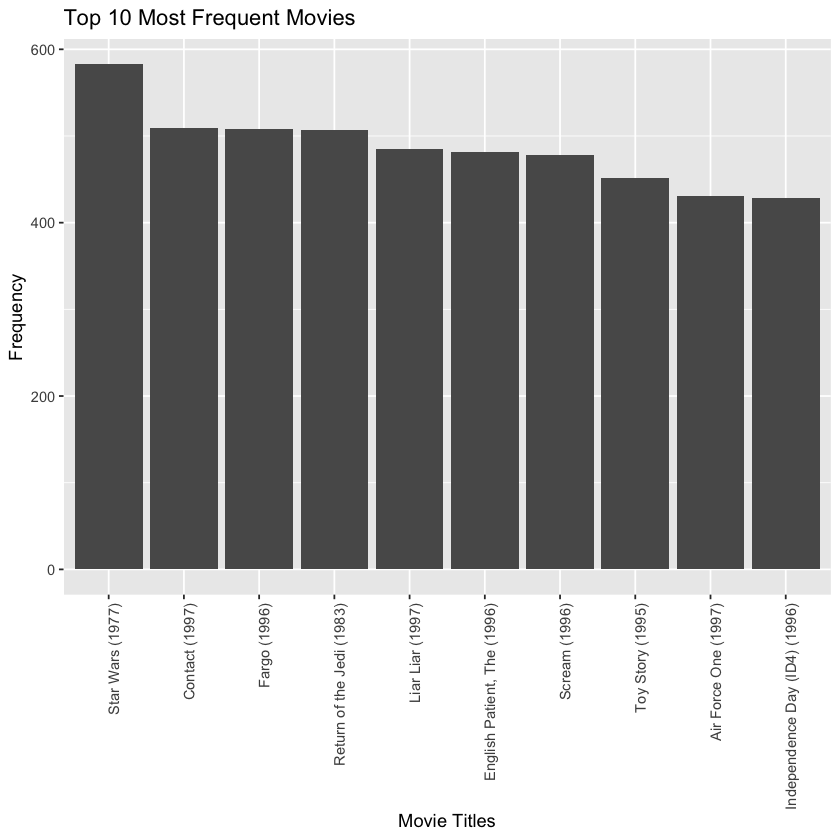

In [8]:
# load necessary libraries
library(dplyr)
library(ggplot2)
# Count the frequency of each movie and create  a new data frame
movieCount <- df %>%
    group_by(item) %>%
    summarize(freq = n()) %>%
    arrange(desc(freq))

test_that("movieCount has the right frequency", {
    result <- sum(movieCount$freq)
    expect_equal(result, nrow(df))
    }
)

# Plot the top 10 most frequent movies
ggplot(
    head(movieCount, 10),
    aes(x = reorder(item, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    xlab("Movie Titles") +
    ylab("Frequency") +
    ggtitle("Top 10 Most Frequent Movies") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

We see the top 10 most frequent watched movies, further below we investigate which genres are the most frequent watched.

Test passed 🎊


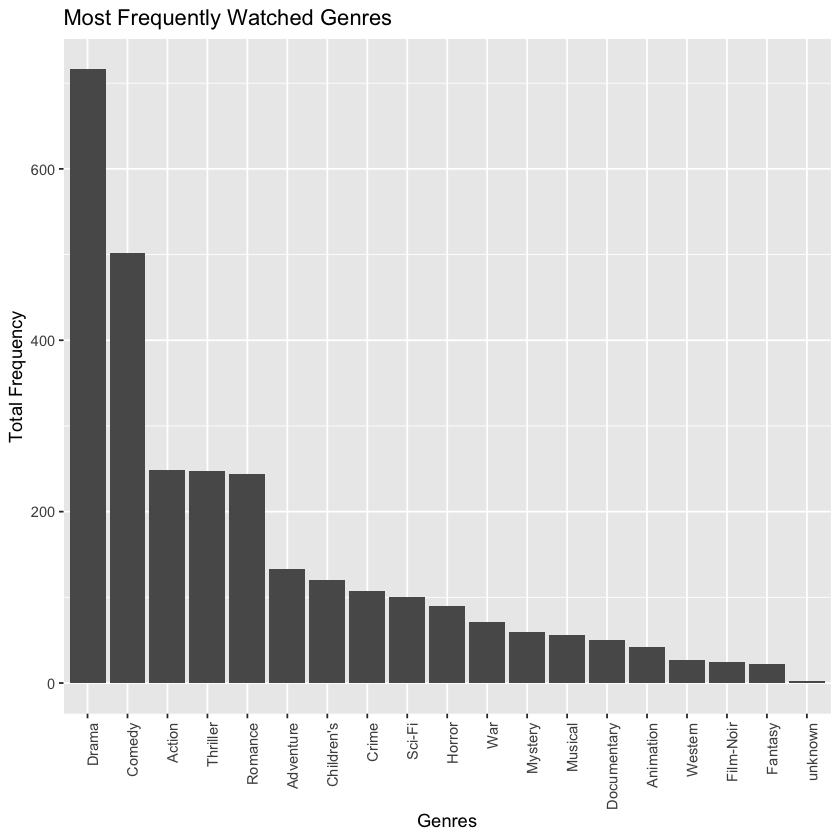

In [9]:
# TODO create repo and invite tobias.lauber1
# TODO comment all plots

# Count the frequency of each genre and create a new data frame
merged <- left_join(df, dfMeta, by = c("item" = "title"))
# Summarize by Genre
dfMetaGenres <- select(dfMeta, -(1:3))
# sum all genre columns
genreCount <- colSums(dfMetaGenres, na.rm = TRUE)
# create df
genreCountDf <- data.frame(genre = names(genreCount), freq = genreCount)

# Test stuff
test_that("genreCountDf has the right frequency", {
    result <- sum(genreCountDf$freq)
    expect_equal(result, sum(genreCount))
    }
)

# Plot the top most frequent genres in descending order
ggplot(
  genreCountDf,
  aes(x = reorder(genre, -freq), y = freq)) +
  geom_bar(stat = "identity") +
  xlab("Genres") +
  ylab("Total Frequency") +
  ggtitle("Most Frequently Watched Genres") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

The plot shows the most frequently watches genres in descending order.  
There is a clear imbalance in the genres, which can lead to a popularity bias, say the tendency to recommend popular items.  
Which in turn can lead to even more people watching dramas and reinforce the bias.  
An additional problem is that the same movie can be categorized in multiple genres, which can be misleading for the interpretation of the data.

### 2. Wie verteilen sich die Nutzerratings der Filme gesamthaft bzw. nach Genres?

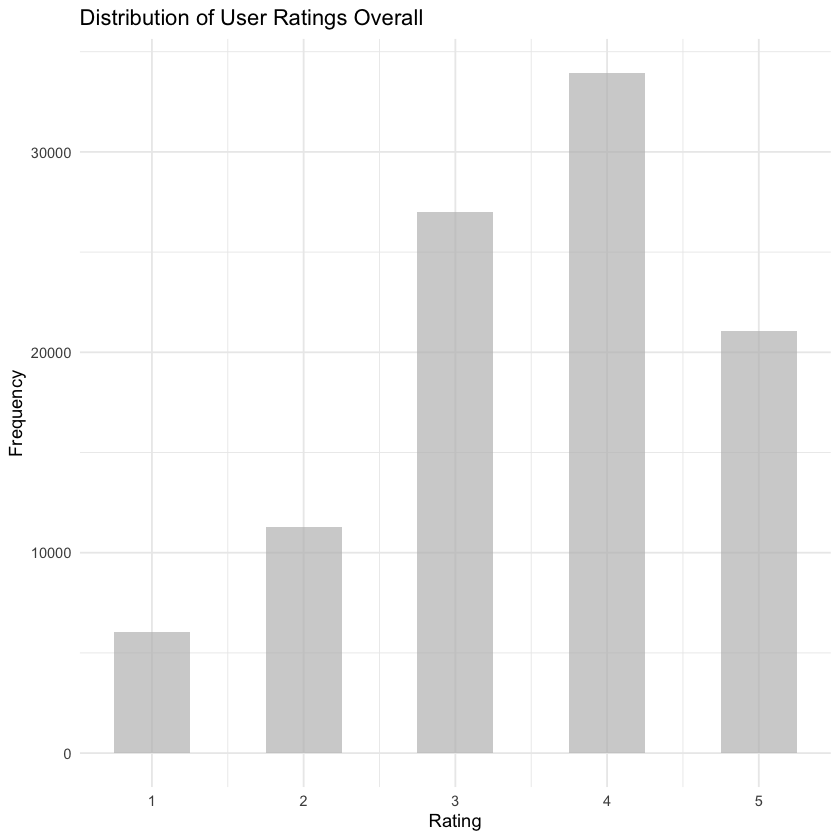

In [10]:
# Distribution of Overall Ratings
ggplot(
  df,
  aes(x = rating)) +
  geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
  xlab("Rating") +
  ylab("Frequency") +
  ggtitle("Distribution of User Ratings Overall") +
  theme_minimal()

The distribution of user ratings is overall positive, with the majority of users rating 3 or higher.  
3, 4 and 5 dominate the ratings, but the problem with 3 is that there are users for whom a 3-star rating is a bad rating and for others it is a good rating.  
We will see how to deal with this problem later.

Test passed 🎉


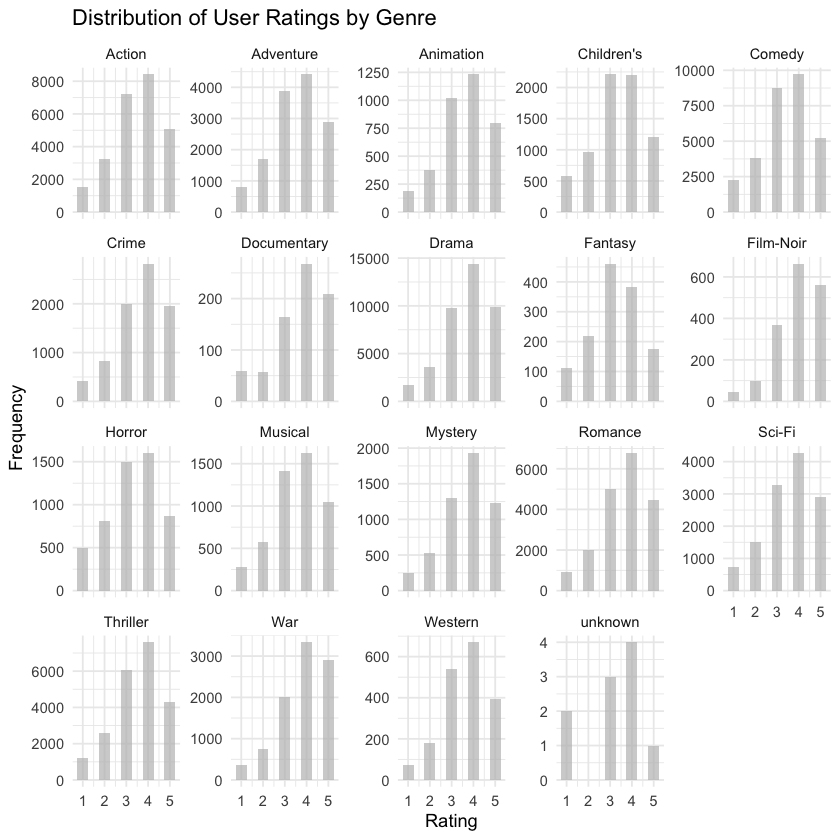

In [11]:
genreRatings <- data.frame()
mergedRatingsGenre <- left_join(df, dfMeta, by = c("item" = "title"))
genreCols <- names(dfMetaGenres)

for(genre in genreCols) {
    # Filter the data to only include ratings for movies that belong to the current genre
    filteredData <- mergedRatingsGenre[mergedRatingsGenre[genre] == 1, ]
    # Add ratings to a new data frame tagged by genre
    rows <- data.frame(rating = filteredData$rating, genre = genre)
    # Add new rows to result data frame
    genreRatings <- rbind(genreRatings, rows)
}
ggplot(
    genreRatings,
    aes(x = rating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    facet_wrap(~genre, scales = "free_y") +
    xlab("Rating") +
    ylab("Frequency") +
    ggtitle("Distribution of User Ratings by Genre") +
    theme_minimal()

# test stuff
test_that("There are more genreRatings because one movie can be specified as multiple genres", {
  expect_false(identical(nrow(genreRatings), nrow(df)))
})

### 3. Wie verteilen sich die mittleren Ratings pro Film bzw. pro Nutzer*in?

item,avgRating
<chr>,<dbl>
Aiqing wansui (1994),5
Entertaining Angels: The Dorothy Day Story (1996),5
"Great Day in Harlem, A (1994)",5
Marlene Dietrich: Shadow and Light (1996),5
Prefontaine (1997),5
"Saint of Fort Washington, The (1993)",5


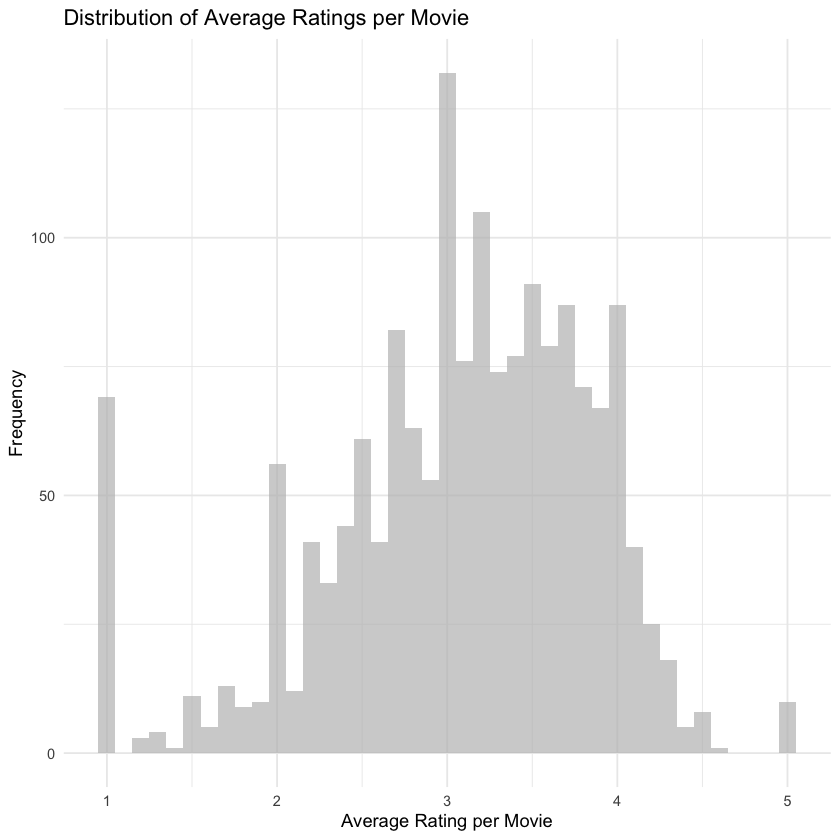

In [12]:
# Average Rating per Movie
avgRatingMovie <- df %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))
head(avgRatingMovie)
# Distribution of average ratings per movie
ggplot(avgRatingMovie, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie") +
    theme_minimal()

We see that the highest frequency of the average ratings per movie is between 2.5 and 4.  
Therefore most people rated movies between 3 and 4.

user,avgRating
<chr>,<dbl>
849,4.869565
688,4.833333
507,4.724138
628,4.703704
928,4.677419
118,4.661972


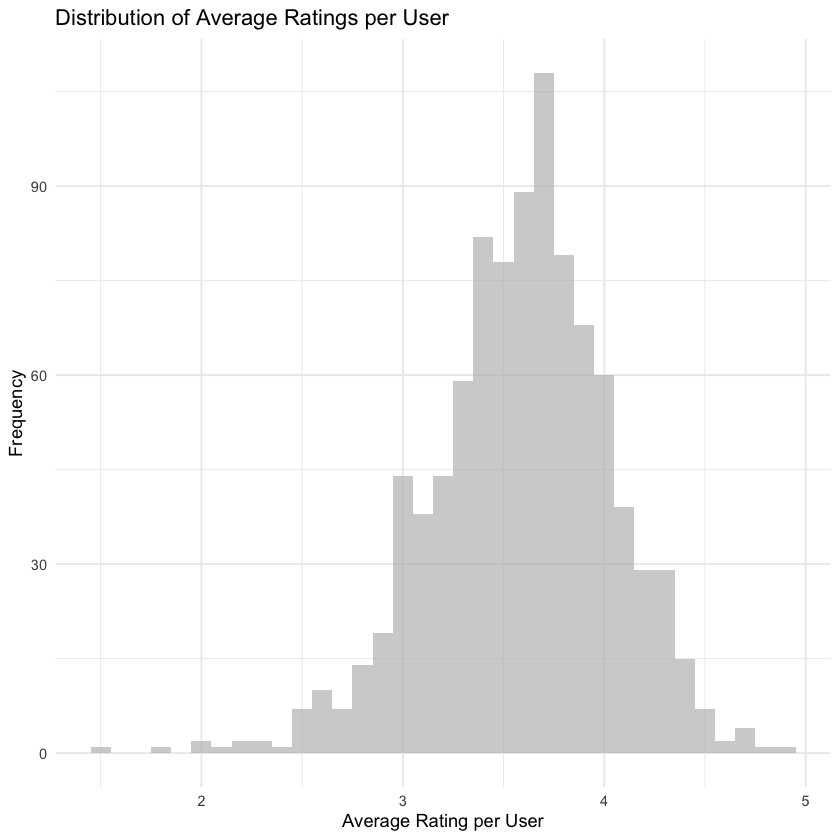

In [13]:
# Average Ratings per User
avgRatingUser <- df %>%
    group_by(user) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))
head(avgRatingUser)
# Distribution of average ratings per user
ggplot(avgRatingUser, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per User") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per User") +
    theme_minimal()

The highest frequency for individual users is between 3.5 and 4.  
That means the average user tends to rate movies generally positive.

### 4. Welchen Einfluss hat die Normierung der Ratings pro Nutzer*in auf die Verteilung der mittleren Nutzer-ratings?
Normalization eliminates user bias in collaborative filtering. Different users may have different rating standards, some may be more generous than others. Normalization centers each users rating around zero, making comparisons between users more meaningful, e.g. a normalized rating of zero would mean that the user finds the object average by their own standards. Before normalization, we do not see a clear difference between users rating preferences, while after normalization we see the similarities between users and their rating preferences, whether negative or positive.

,user,item,rating
,<chr>,<chr>,<dbl>
1,1,Toy Story (1995),1.3948339
453,1,GoldenEye (1995),-0.6051661
584,1,Four Rooms (1995),0.3948339
674,1,Get Shorty (1995),-0.6051661
883,1,Copycat (1995),-0.6051661
969,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),1.3948339


Test passed 🌈


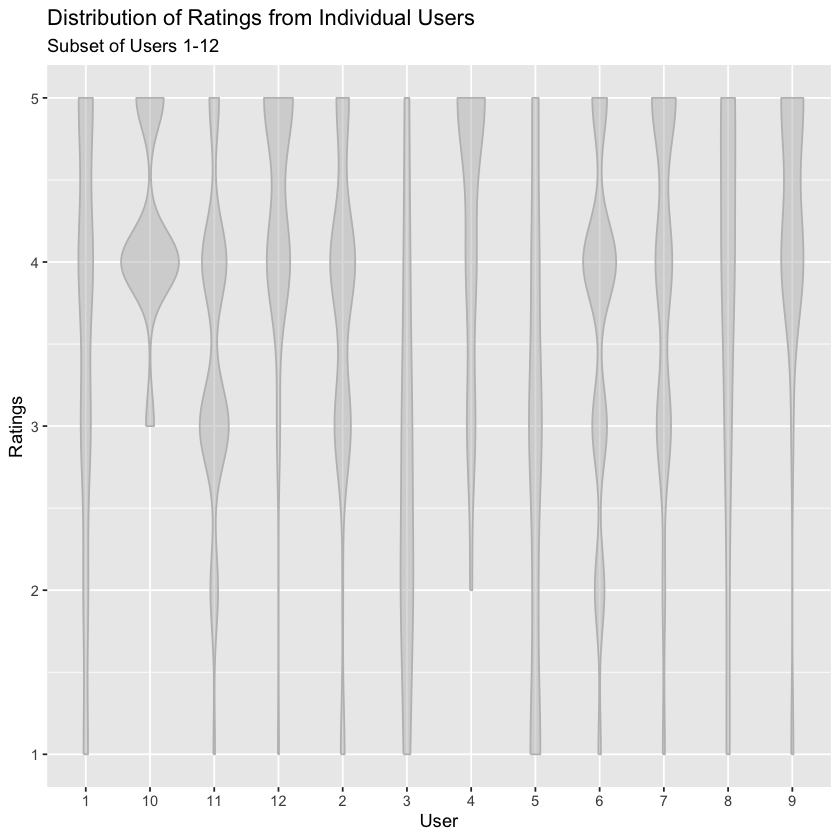

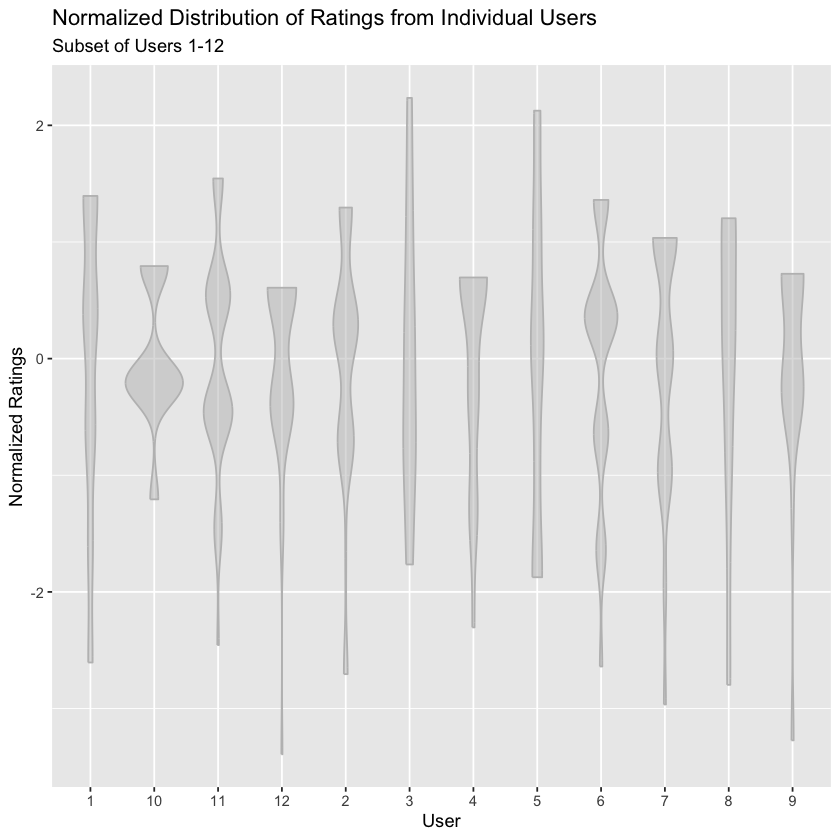

In [14]:
# Normalize the MovieLense data
Norm <- normalize(MovieLense)
dfNorm <- as(Norm, "data.frame")
head(dfNorm)

# Calculate average ratings per user
avgNormRatingUser <- dfNorm %>%
    group_by(user) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

# test that the mean is around zero
test_that("The mean is around zero", {
    expect_true(all.equal(mean(avgNormRatingUser$avgRating), 0, tolerance = 0.01))
})

# Visualize for a subset of users for non normalized data
df %>% filter(user %in% 1:12) %>%
    ggplot(aes(x = user, y = rating)) +
    geom_violin(color = "grey", fill = "grey", alpha = 0.5) +
    labs(x = "User",
         y = "Ratings",
         title = "Distribution of Ratings from Individual Users",
         subtitle = "Subset of Users 1-12")

# Visualize for a subset of users for normalized data
dfNorm %>% filter(user %in% 1:12) %>%
    ggplot(aes(x = user, y = rating)) +
    geom_violin(color = "grey", fill = "grey", alpha = 0.5) +
    labs(x = "User",
         y = "Normalized Ratings",
         title = "Normalized Distribution of Ratings from Individual Users",
         subtitle = "Subset of Users 1-12")

### 5. Welche strukturellen Charakteristika und Auffälligkeiten zeigt die User-Item Matrix?
The user item matrix represents the interactions or ratings between users and items. 
In the image below the colored dots represent interactions or in our case ratings. 
The large number of empty space indicates that users have not interacted with any item.  
This is a common problem in real world user-item matrices, as not every user interacts with every item.  
The sparsity level of the item-user-matrix for the movielens dataset is ca. 93.7%.  

In [15]:
MovieLense

943 x 1664 rating matrix of class ‘realRatingMatrix’ with 99392 ratings.

[1] "Sparsity Level:  93.67 %"


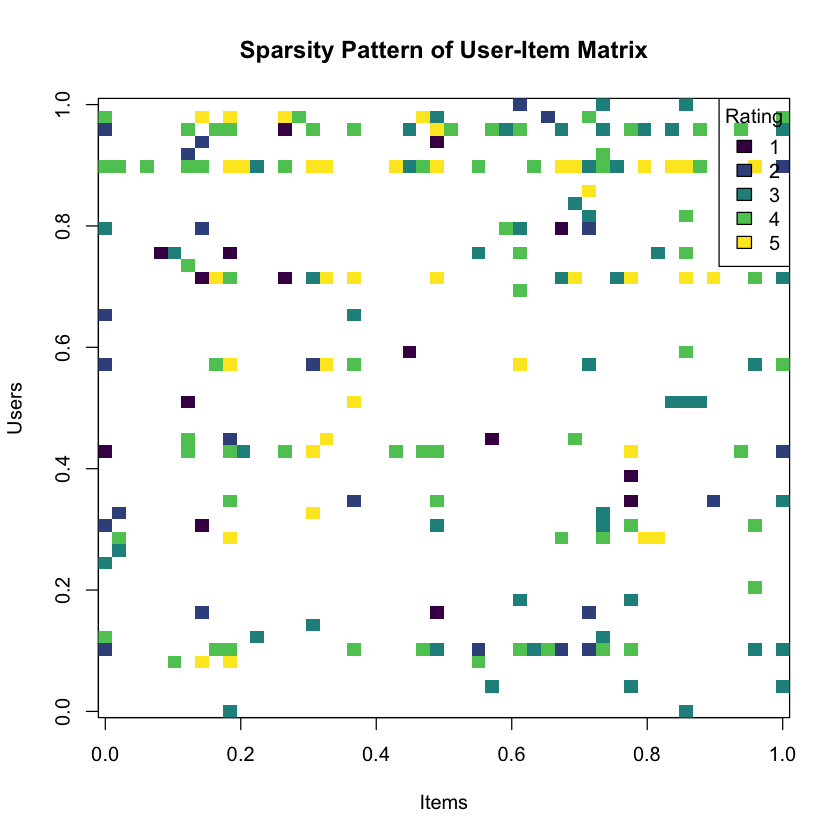

In [16]:
library(viridis)
# Set a random seed for reproducibility
set.seed(42)

smallM <- MovieLense[
    sample(nrow(MovieLense), 50),sample(ncol(MovieLense), 50)
]
# Visualize the sparsity pattern of the smallMovieLense matrix
library(Matrix)
image(as(smallM, "matrix"), main = "Sparsity Pattern of User-Item Matrix", xlab = "Items", ylab = "Users", col = viridis(5))
legend("topright", legend = c("1", "2", "3", "4", "5"), fill = viridis(5), title = "Rating")

# Calculate sparsity level
movieMatrix <- as(MovieLense, "matrix")
totalN <- length(movieMatrix)
filledN <- sum(
    !is.na(movieMatrix) & movieMatrix > 0,
    na.rm = TRUE
)
sparsityLevel <- (totalN - filledN) / totalN
print(paste("Sparsity Level: ", round(sparsityLevel * 100, 2), "%"))

## 6.2 Datenreduktion
### Aufgabe 2: Reduziere den MovieLens Datensatz auf rund 400 Nutzerinnen und 700 Filme, indem du Filme und Nutzerinnen mit sehr wenigen Ratings entfernst.
#### 1. Anzahl Filme und Nutzer*innen sowie Sparsity vor und nach Datenreduktion

In [17]:
# Set a random seed for reproducibility
set.seed(42)

# Filter out users and movies with fewer ratings
# Adjust fUser and fMovie as per your requirement
fUser <- 80
fMovie <- 40

filteredUsers <- df %>%
    group_by(user) %>%
    filter(n() >= fUser) %>%
    ungroup()

filteredMovies <- df %>%
    group_by(item) %>%
    filter(n() >= fMovie) %>%
    ungroup()

dfReduced <- df %>%
    filter(user %in% filteredUsers$user, item %in% filteredMovies$item)

uniqueUsers <- unique(dfReduced$user)

# create dfreduced1 with first 300 users
usersReduced1 <- uniqueUsers[1:300]
dfReduced1 <- dfReduced %>%
    filter(user %in% usersReduced1)

# create dfreduced2 with users 101-400
usersReduced2 <- uniqueUsers[101:400]
dfReduced2 <- dfReduced %>%
    filter(user %in% usersReduced2)

## Calculate sparsity level
calculateSparsity <- function(df) {
    nUsers <- n_distinct(df$user)
    nMovies <- n_distinct(df$item)
    totalInteractions <- nUsers * nMovies
    actualInteractions <- nrow(df)
    sparsity <- 1 - (actualInteractions / totalInteractions)
    return(sparsity)
}

# Investigate
## Number of movies, users, sparsity level before and after
nUsersBefore <- n_distinct(df$user)
nMoviesBefore <- n_distinct(df$item)
sparsityBefore <- calculateSparsity(df)
sparsityAfter1 <- calculateSparsity(dfReduced1)
sparsityAfter2 <- calculateSparsity(dfReduced2)
cat("Treshold x for user ratings:", fUser, "\n")
cat("Treshold y for movie ratings:", fMovie, "\n")
cat("Number of movies dfReduced:", n_distinct(dfReduced$item), "\n")
cat("Number of users dfReduced1:", n_distinct(dfReduced1$user), "\n")
cat("Number of users dfReduced2:", n_distinct(dfReduced2$user), "\n")


Treshold x for user ratings: 80 
Treshold y for movie ratings: 40 
Number of movies dfReduced: 705 
Number of users dfReduced1: 300 
Number of users dfReduced2: 300 


Filtering out users with ratings less or equal than 80 gives us ca. 400 users and filtering out movies with ratings less or equal than 80 gives us ca. 700 movies.  
The relative reduction for both are now round about 55%.  
The sparsity level of the item-user-matrix for the reduced dataset is ca. 75%.  
That means we reduced the dataset by 55% but only reduced the sparsity by 20%.  
Dividing the reduced dataset further into two datasets where the first one has the 300 users with the most ratings and the second one has the users from 100 up to 400.  
The sparsity level of the item-user-matrix for the first dataset is ca. 37% and for the second dataset ca. 60%.  

#### 2. Mittlere Nutzerratings pro Film vor und nach Datenreduktion.

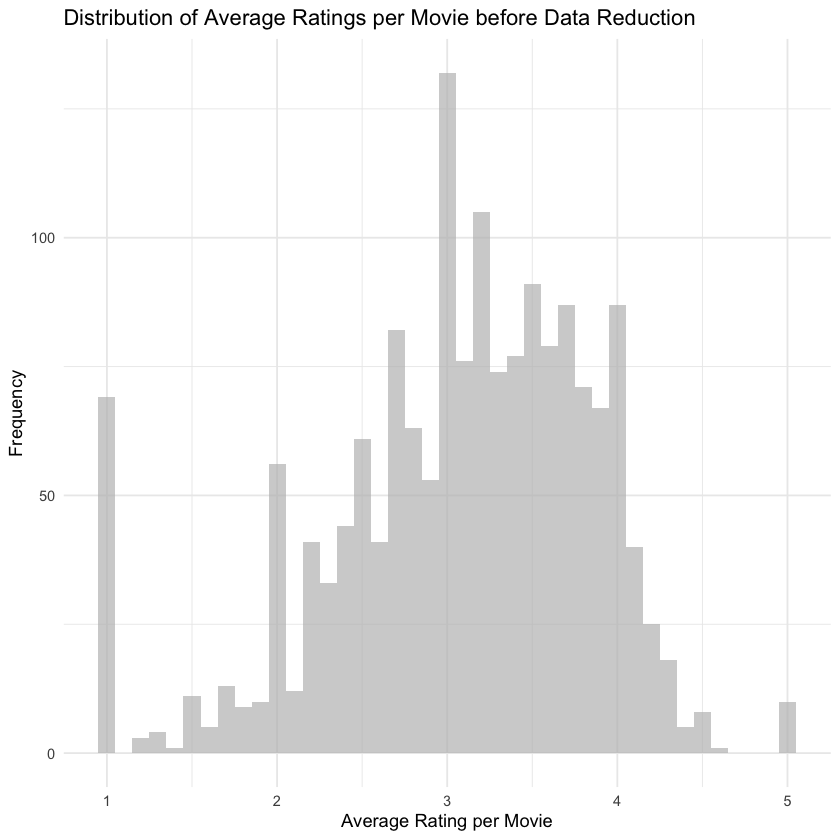

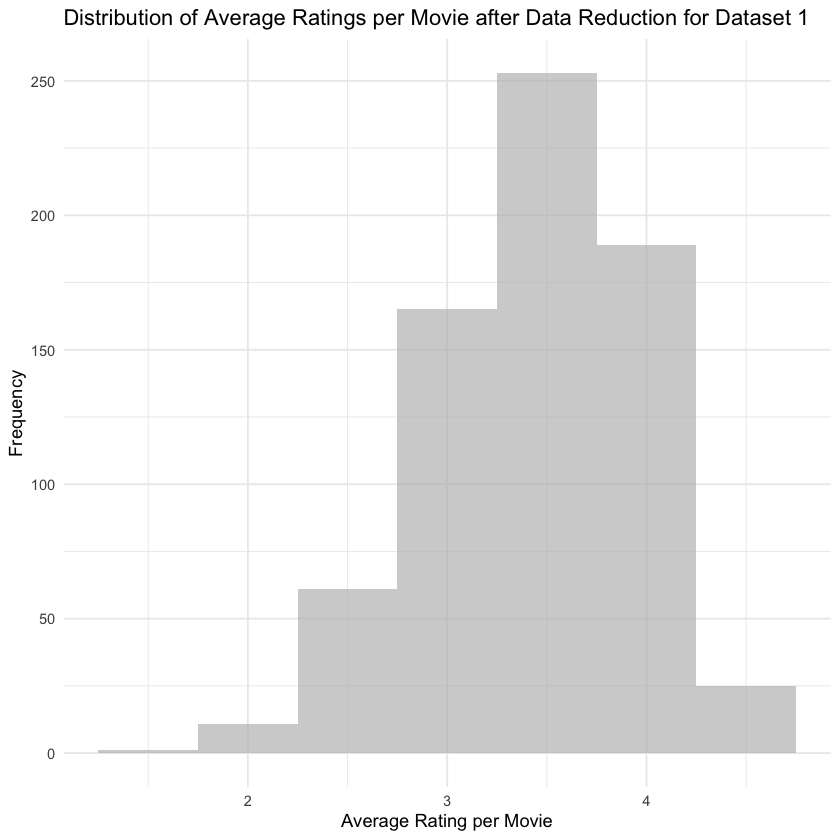

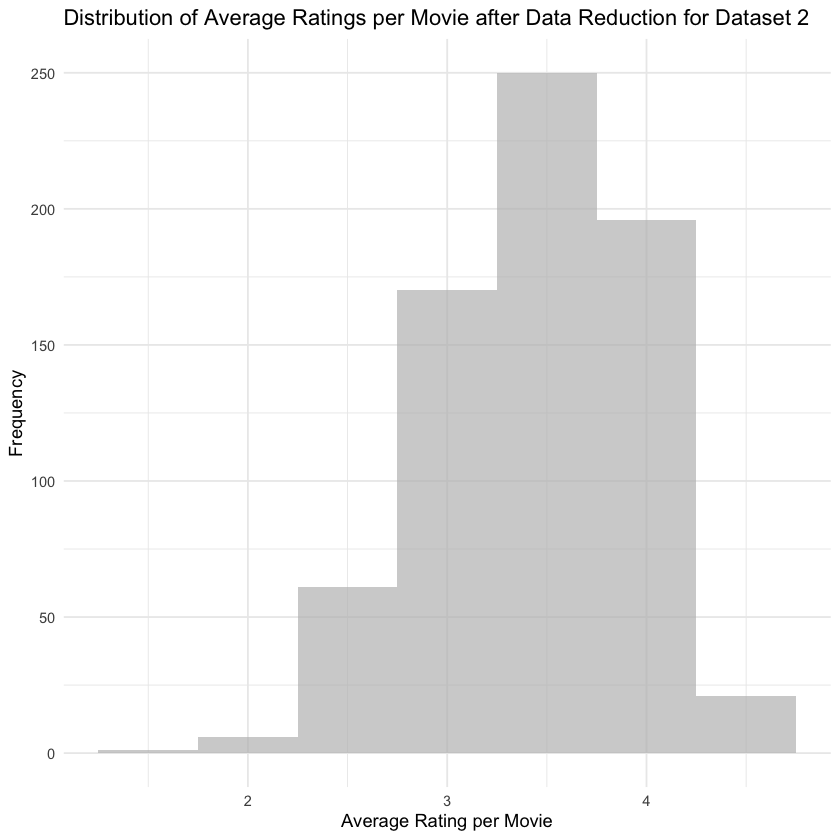

In [18]:
avgRatingMovieBefore <- df %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

avgRatingMovieAfter1 <- dfReduced1 %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))

avgRatingMovieAfter2 <- dfReduced2 %>%
    group_by(item) %>%
    summarize(avgRating = mean(rating)) %>%
    arrange(desc(avgRating))


ggplot(avgRatingMovieBefore, aes(x = avgRating)) + 
    geom_histogram(binwidth = 0.1, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie before Data Reduction") +
    theme_minimal()
ggplot(avgRatingMovieAfter1, aes(x = avgRating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie after Data Reduction for Dataset 1") +
    theme_minimal()
ggplot(avgRatingMovieAfter2, aes(x = avgRating)) +
    geom_histogram(binwidth = 0.5, fill = "grey", alpha = 0.7) +
    xlab("Average Rating per Movie") +
    ylab("Frequency") +
    ggtitle("Distribution of Average Ratings per Movie after Data Reduction for Dataset 2") +
    theme_minimal()

Due to the further reduction of the dataset into two datasets, we see less frequency between the ratings.  
Therefore the binwidth has to be adjusted.  
Both datasets have some similarities in the distribution although the first ones ratings are on average higher,  
whereas the second ones ratings are on average lower.  
The users with the most ratings tend to rate higher than the users with less ratings.

#### 3. Zusatz für Gruppen: Quantifiziere die “Intersection over Union” aller reduzierten Datensätze paarweise.

In [19]:
# Calculate Intersection over Union
userIntersect <- intersect(dfReduced1$user, dfReduced2$user)
userUnion <- union(dfReduced1$user, dfReduced2$user)
userIoU <- length(userIntersect) / length(userUnion)
cat("Intersection over Union for users:", userIoU, "\n")
movieIntersect <- intersect(dfReduced1$item, dfReduced2$item)
movieUnion <- union(dfReduced1$item, dfReduced2$item)
movieIoU <- length(movieIntersect) / length(movieUnion)
cat("Intersection over Union for movies:", movieIoU, "\n")

Intersection over Union for users: 0.5 
Intersection over Union for movies: 1 


The intersection over union is a measure of the overlap between two data sets.  
For the user IoU, there is an overlap of about 67% between the first and second data sets.  
For the movies IoU, the overlap between the first and second data sets is about 60%.  
The overlap is quite reasonable and therefore the data sets are not too similar.  
We could reduce the similarity by choosing other splitting techniques, e.g. instead of 400 users we could have 700,  
and the indexing could range from 1 to 500 and from 201 to 700 and see how the IoU behaves.

# 6.3 Analyse Ähnlichkeitsmatrix
## Aufgabe 3: Erzeuge einen IBCF Recommender und analysiere die Ähnlichkeitsmatrix des trainierten Modelles für den reduzierten Datensatz.
### 1. Zerlege den Datensatz in Trainings- und Testdaten im verhältnis 4:1.

In [20]:
# convert from df to realRatingMatrix
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")

evalScheme <- evaluationScheme(
    matrixReduced1,
    method = "split",
    train = 0.8,
    given = 5,
    goodRating = 4
)
evalScheme

Evaluation scheme with 5 items given
Method: ‘split’ with 1 run(s).
Training set proportion: 0.800
Good ratings: >=4.000000
Data set: 300 x 705 rating matrix of class ‘realRatingMatrix’ with 51319 ratings.

### 2. Trainiere ein IBCF Modell mit 30 Nachbarn und Cosine Similarity.

In [21]:
# Get the training set from the evaluationScheme object
trainData <- getData(evalScheme, "train")
testData <- getData(evalScheme, "known")

# Train the IBCF model
trainedModel <- Recommender(
    trainData, method = "IBCF", param = list(k = 30, method = "Cosine")
)

### 3. Bestimme die Filme, die am häufigsten in der Cosine-Ähnlichkeitsmatrix auftauchen und analyisiere Vorkommen und Ratings im reduzierten Datensatz.

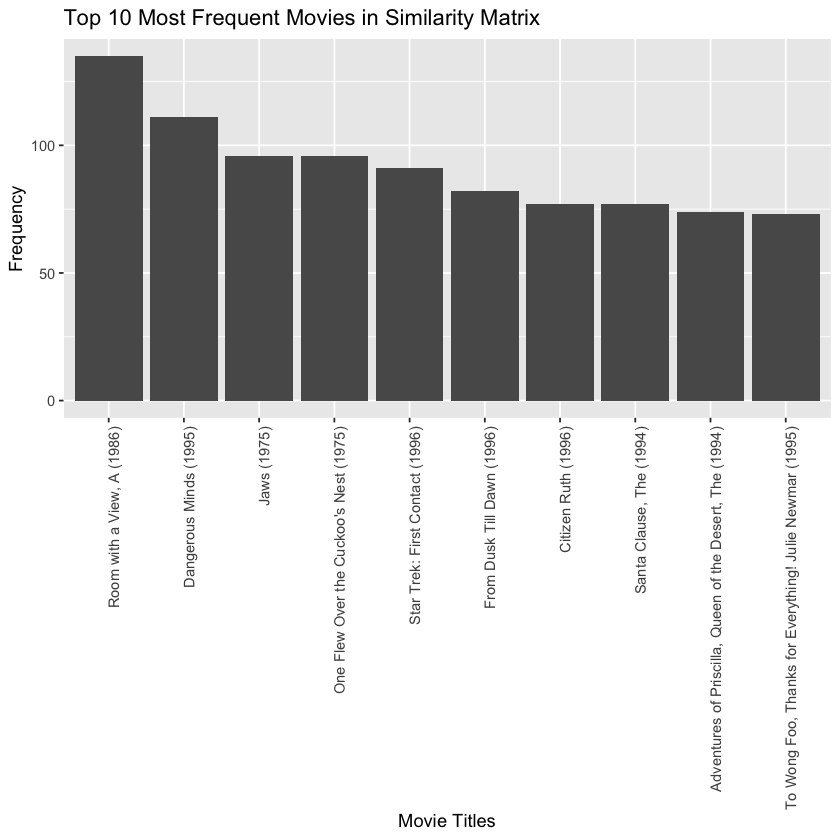

In [22]:
# Access the trained models list
modelList <- getModel(trainedModel)

# Extract the similiraty matrix
simMatrix <- modelList$sim

# Find the top 10 most similar movies
top10 <- apply(simMatrix, 1, function(x)
    order(x, decreasing = TRUE)[1:10]
)

# Unlist and tabulate to find most frequent
mostFrequentMovies <- table(as.vector(top10))
# Sort
mostFrequentMovies <- sort(mostFrequentMovies, decreasing = TRUE)

# process for ggplot2
dfMostFrequentMovies <- as.data.frame(mostFrequentMovies)
colnames(dfMostFrequentMovies) <- c("item", "freq")

# get the names for the movies for given ids in mostFreqentMovies
dfMostFrequentMovies$MovieTitle <- dfMeta[as.numeric(names(mostFrequentMovies)), "title"]
# Visualize
ggplot(
    head(dfMostFrequentMovies, 10),
    aes(x = reorder(MovieTitle, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    xlab("Movie Titles") +
    ylab("Frequency") +
    ggtitle("Top 10 Most Frequent Movies in Similarity Matrix") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)
)

### 4. Wiederhole die Analyse, indem du bei der Datenpartitionierung die Anzahl nicht-maskierter Produkte der Test-User veränderst und kommentiere den Einfluss auf die Resultate.

Processing for given = 5 
Processing for given = 10 


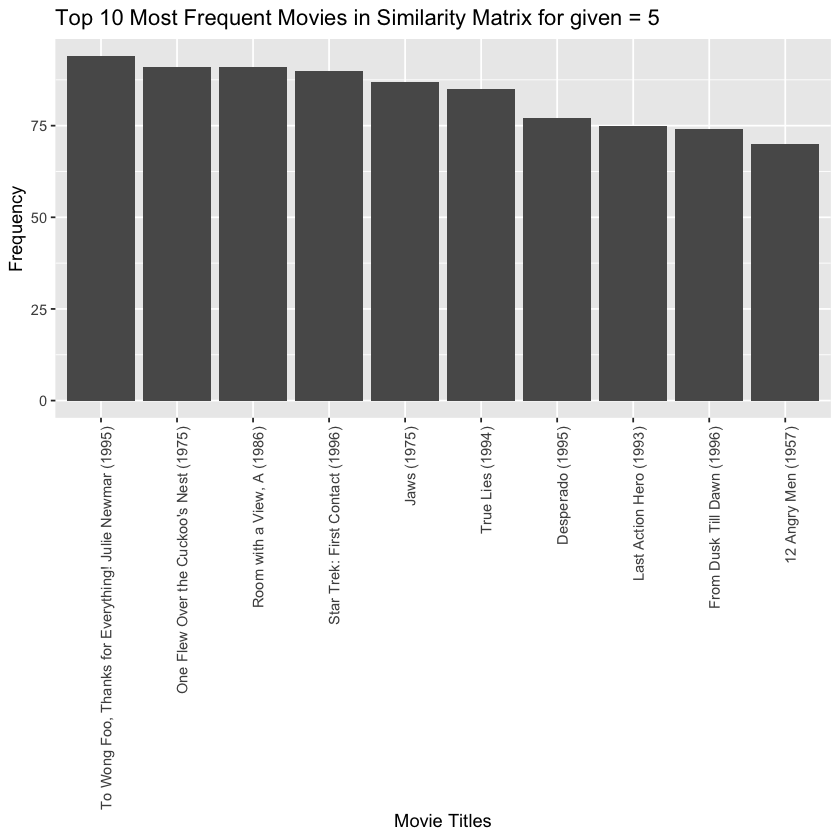

Processing for given = 20 


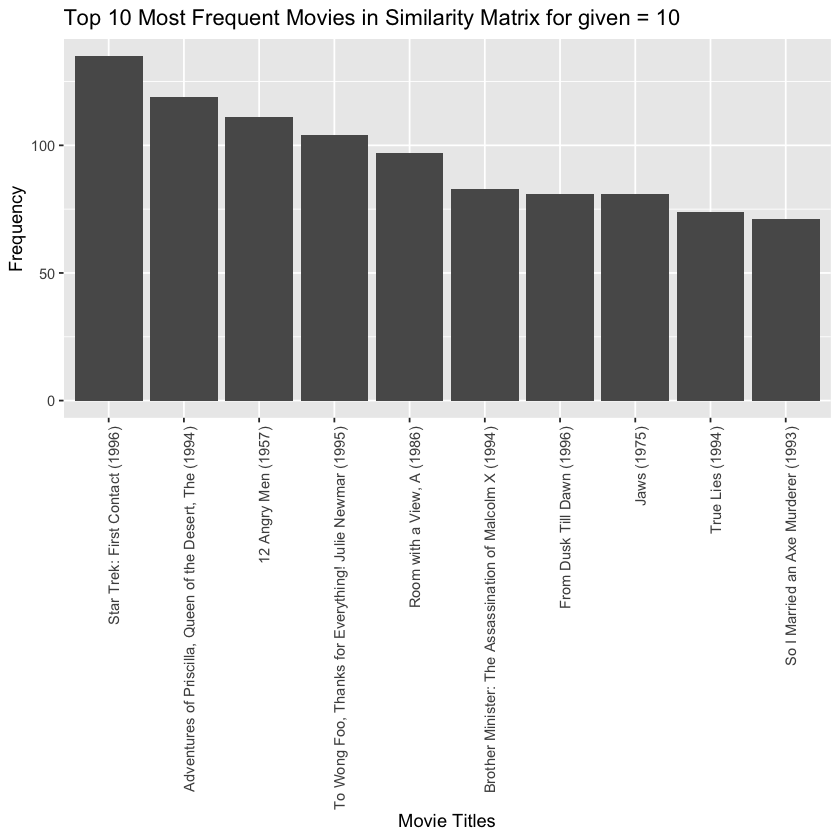

Processing for given = 40 


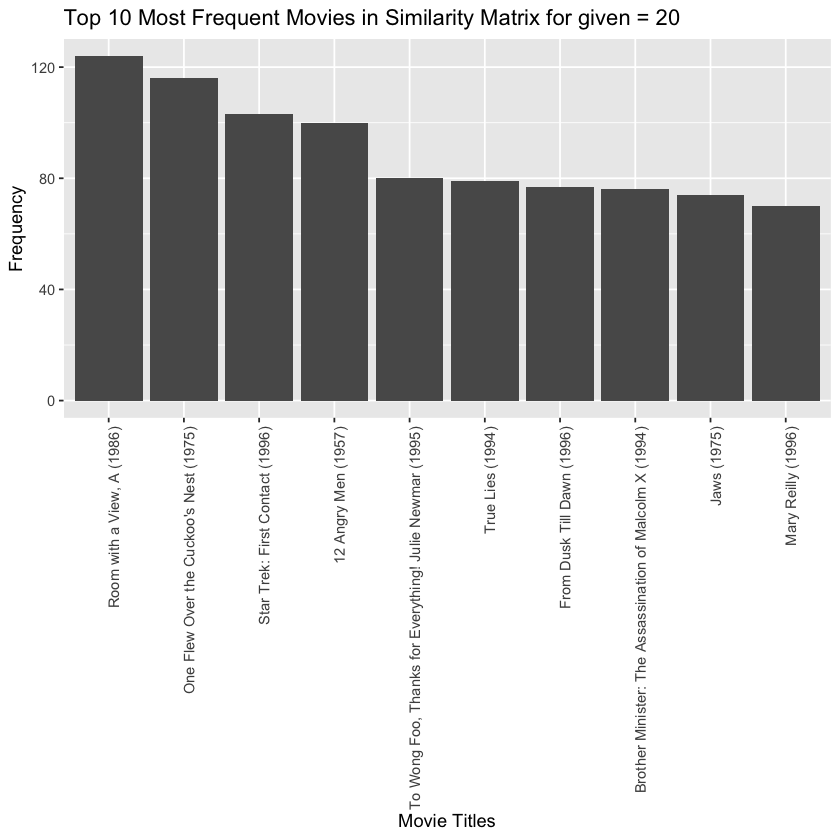

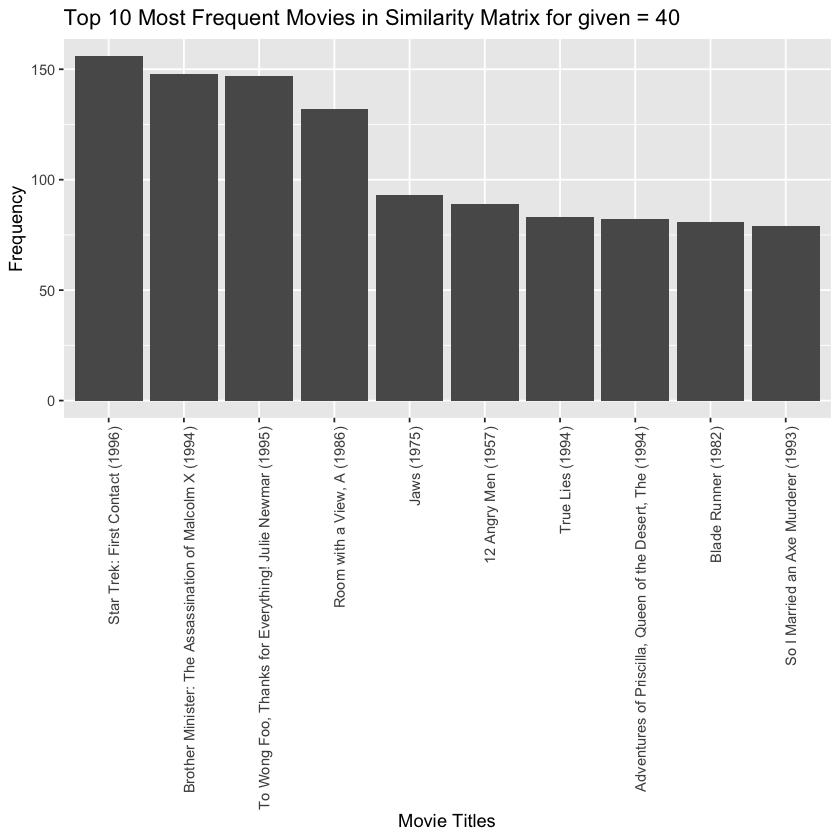

In [24]:
# Convert from df to realRatingMatrix
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")

# Define the given values to iterate over
given_values <- c(5, 10 , 20, 40)

# Iterate over the different given values
for (given in given_values) {
    cat("Processing for given =", given, "\n")
    
    # Create evaluation scheme
    evalScheme <- evaluationScheme(
        matrixReduced1,
        method = "split",
        train = 0.8,
        given = given,
        goodRating = 4
    )
    
    # Train the IBCF model
    trained_model <- Recommender(
        getData(evalScheme, "train"), 
        method = "IBCF", 
        param = list(k = 30, method = "Cosine")
    )

    # Extract the similarity matrix
    simMatrix <- getModel(trained_model)$sim

    # Find the top 10 most similar movies
    top10 <- apply(simMatrix, 1, function(x)
        order(x, decreasing = TRUE)[1:10]
    )

    # Unlist and tabulate to find most frequent
    mostFrequentMovies <- table(as.vector(top10))
    # Sort
    mostFrequentMovies <- sort(mostFrequentMovies, decreasing = TRUE)

    # Process for ggplot2
    dfMostFrequentMovies <- as.data.frame(mostFrequentMovies)
    colnames(dfMostFrequentMovies) <- c("item", "freq")

    # Get the names for the movies for given ids in mostFreqentMovies
    dfMostFrequentMovies$MovieTitle <- dfMeta[as.numeric(names(mostFrequentMovies)), "title"]
    
    # Visualize
    p <- ggplot(
        head(dfMostFrequentMovies, 10),
        aes(x = reorder(MovieTitle, -freq), y = freq)) +
        geom_bar(stat = "identity") +
        xlab("Movie Titles") +
        ylab("Frequency") +
        ggtitle(paste("Top 10 Most Frequent Movies in Similarity Matrix for given =", given)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)
    )
    print(p)
    # ggsave(paste("similarity_matrix_given_", given, ".png", sep=""))
}

The IBCF Recommender uses a test set $Y$ of user profiles that are not part of the training but of the predictions. Additionally, there is a set $Z$ of masked ratings to evaluate the prediction. For the masking process we use the parameter `Given-x` which randomly selects $x$ from all test users for the prediction, the rest is part of the evaluation. We see that for different given values the same result is not always obtained, e.g. the recommendation results for given = 20 differ from those of the others.

# 6.4 Implementierung Ähnlichkeitsmatrix
## Aufgabe 4 (DIY): Implementiere Funktionen zur Berechnung von Ähnlichkeitsmatrizen bei IBCF Recommenders für (a) Cosine Similarity mit ordinale Ratings und (b) Jaccard Similarity mit binären Ratings

### 1. Vergleiche die Resultate beider Funktionen hinsichtlich Übereinstimmung und Laufzeit mit dem Resultat der Funktion Recommender() und der eines anderen R-Paketes anhand 100 zufällig gewählter Filme.
The custom function and the proxy calculation have similar runtimes. They are 4 times higher than the Recommender() function.  

The MAE value between cosineSimMatrix and recCosineSimMatrix (0.30) indicates a greater degree of dissimilarity between these two matrices. This indicates that on average there are remarkable absolute differences between the two matrices.  

On the other hand, the MAE value between cosineSimMatrix and cosineSimMatrixProxy (0.15) is lower, indicating a greater degree of similarity between these two matrices. This indicates that, on average, cosineSimMatrixProxy agrees better with those in cosineSimMatrix than with the recCosineSimMatrix.

In [25]:
library(recommenderlab)

if (!all(c("user", "item", "rating") %in% colnames(dfReduced1))) {
    stop("dfReduced1 does not contain the columns 'user', 'item', and 'rating'")
}

calculateCosineSimilarity <- function(ratingMatrix) {
    # Ensure matrix is in the correct format
    if (!inherits(ratingMatrix, "realRatingMatrix")) {
        stop("Input is not a realRatingMatrix")
    }
    
    # Access the data slot and transpose to work with items as rows
    mat <- t(as(ratingMatrix@data, "matrix"))
    
    # Normalize each row (item) of the matrix
    mat <- t(apply(mat, 1, function(row) {
        norm <- sqrt(sum(row^2))
        if(norm > 0) row / norm else row
    }))
    
    # Compute cosine similarity
    simMatrix <- mat %*% t(mat)
    
    return(simMatrix)
}

library(reshape2)

# Ensuring dfReduced1 is a data frame with the required columns
if (!all(c("user", "item", "rating") %in% colnames(dfReduced1))) {
    stop("dfReduced1 does not contain the columns 'user', 'item', and 'rating'")
}

# Convert dfReduced1 into a wide format matrix
wideMatrix <- acast(dfReduced1, user ~ item, value.var = "rating")

# Create a realRatingMatrix from the wide format matrix
realRatingMatrix1 <- as(wideMatrix, "realRatingMatrix")

# Selecting 100 random movies
set.seed(123)
selected_movies <- sample(colnames(realRatingMatrix1), 100)

# Reducing the matrix to only selected movies
reducedMatrix1 <- realRatingMatrix1[, selected_movies]

# Checking dimensions
test_that("reducedMatrix1 has the right dimensions", {
    expect_equal(dim(reducedMatrix1), c(300, 100))
})
cat("Dimensions of reducedMatrix1:", dim(reducedMatrix1), "\n")

# Compute Cosine Similarity Matrix using the custom function
startTime <- Sys.time()
cosineSimMatrix <- calculateCosineSimilarity(reducedMatrix1)
endTime <- Sys.time()
runtimeCustom <- endTime - startTime
cat("Runtime for custom function:", runtimeCustom, "\n")
test_that("cosineSimMatrix has the right dimensions", {
    expect_equal(dim(cosineSimMatrix), c(100, 100))
})
cat("Dimensions of cosineSimMatrix:", dim(cosineSimMatrix), "\n")



Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths




Test passed 🥳
Dimensions of reducedMatrix1: 300 100 
Runtime for custom function: 0.01296091 
Test passed 🥇
Dimensions of cosineSimMatrix: 100 100 


In [26]:
library(recommenderlab)

# Use the Recommender() function with method IBCF and cosine similarity
startTime <- Sys.time()
ibcf_model <- Recommender(
    data = reducedMatrix1,
    method = "IBCF",
    param = list(method = "Cosine", k = 30)
)

# Extract the similarity matrix from the model
recCosineSimMatrix <- as.matrix(getModel(ibcf_model)$sim)
endTime <- Sys.time()
runtimeRec <- endTime - startTime
cat("Runtime for Recommender():", runtimeRec, "\n")

# Check the dimensions of the similarity matrix
cat("Dimensions of recCosineSimMatrix:", dim(recCosineSimMatrix), "\n")


Runtime for Recommender(): 0.01293802 
Dimensions of recCosineSimMatrix: 100 100 


In [27]:
calculateCosineSimilarityProxy <- function(ratingMatrix) {
    # Ensure matrix is in the correct format
    if (!inherits(ratingMatrix, "realRatingMatrix")) {
        stop("Input is not a realRatingMatrix")
    }
    
    # Convert the rating matrix to a matrix
    mat <- as(ratingMatrix@data, "matrix")
    
    # Calculate Cosine Similarity for items (movies)
    simMatrix <- proxy::simil(t(mat), method = "cosine")
    
    return(simMatrix)
}

# Calculate Cosine Similarity using the modified function
startTime <- Sys.time()
cosineSimMatrixProxy <- calculateCosineSimilarityProxy(reducedMatrix1)
endTime <- Sys.time()
runtimeProxy <- endTime - startTime
cat("Runtime for calculateCosineSimilarityProxy:", runtimeProxy, "\n")
cat("Dimensions of cosineSimMatrixProxy:", dim(cosineSimMatrixProxy), "\n")

Runtime for calculateCosineSimilarityProxy: 0.004009008 
Dimensions of cosineSimMatrixProxy: 100 100 


In [28]:
# Calculate the Mean Absolute Error (MAE) between cosineSimMatrix and recCosineSimMatrix
suppressWarnings({mae_rec <- mean(abs(cosineSimMatrix - recCosineSimMatrix), na.rm = TRUE)})

# Calculate the Mean Absolute Error (MAE) between cosineSimMatrix and cosineSimMatrixProxy
suppressWarnings({mae_proxy <- mean(abs(cosineSimMatrix - cosineSimMatrixProxy), na.rm = TRUE)})

# Display the MAE values
cat("Mean Absolute Error with recCosineSimMatrix:", mae_rec, "\n")
cat("Mean Absolute Error with cosineSimMatrixProxy:", mae_proxy, "\n")

Mean Absolute Error with recCosineSimMatrix: 0.303578 
Mean Absolute Error with cosineSimMatrixProxy: 0.1517684 


In [29]:
getJaccardSim <- function(ratingMatrix, nUser, nItem){
  
  slicedMatrixBin <- as(binarize(ratingMatrix[1:nUser, 1:nItem], minRating=4), "matrix")
  
  slicedMatrixBinT <- t(slicedMatrixBin)
  
  matrixCrossProd <- tcrossprod(slicedMatrixBinT)
  
  im <- which(matrixCrossProd > 0, arr.ind=TRUE)
  b <- rowSums(slicedMatrixBinT)
  aim <- matrixCrossProd[im]
  
  j = sparseMatrix(
            i = im[,1],
            j = im[,2],
            x = aim / (b[im[,1]] + b[im[,2]] - aim),
            dims = dim(matrixCrossProd)
      )
  
  j <- data.matrix(j)
  
  j
}

jaccardSim <- getJaccardSim(matrixReduced1, 100, 100)
jaccardSim[1:5, 1:5]

1.00000000,0.04347826,0.1111111,0.00000000,0.08333333
0.04347826,1.00000000,0.0000000,0.04347826,0.00000000
0.11111111,0.00000000,1.0000000,0.00000000,0.00000000
0.00000000,0.04347826,0.0000000,1.00000000,0.00000000
0.08333333,0.00000000,0.0000000,0.00000000,1.00000000


### 2. Visualisiere und vergleiche die Verteilung der Ähnlichkeiten von Cosine Similarity für ordinale Ratings und von Jaccard Similarity für binäre Ratings mittels den von dir implementierten Funktionen.

In [30]:
wideMatrix <- acast(dfReduced1, user ~ item, value.var = "rating")
realRatingMatrix1 <- as(wideMatrix, "realRatingMatrix")
set.seed(123)
selected_movies <- sample(colnames(realRatingMatrix1), 100)
reducedMatrix1 <- realRatingMatrix1[, selected_movies]
cosineSimMatrix <- calculateCosineSimilarity(reducedMatrix1)

jaccardSim <- getJaccardSim(matrixReduced1, 100, 100)

rownames(cosineSimMatrix) <- NULL
colnames(cosineSimMatrix) <- NULL

In [31]:
convert_to_long <- function(matrix, name = "matrix") {
    as.data.frame(as.table(as.matrix(matrix))) %>%
        rename(Item1 = Var1, Item2 = Var2, Similarity = Freq) %>%
        mutate(Matrix = name)
}
cosineLong <- convert_to_long(cosineSimMatrix, "Custom Cosine")
jaccardLong <- convert_to_long(jaccardSim, "Jaccard")

In [32]:
combinedData <- rbind(cosineLong, jaccardLong)
combinedData[1:5, 1:4]

,Item1,Item2,Similarity,Matrix
,<fct>,<fct>,<dbl>,<chr>
1,A,A,1.00000000,Custom Cosine
2,B,A,0.03988054,Custom Cosine
3,C,A,0.07683788,Custom Cosine
4,D,A,0.11501093,Custom Cosine
5,E,A,0.06241989,Custom Cosine


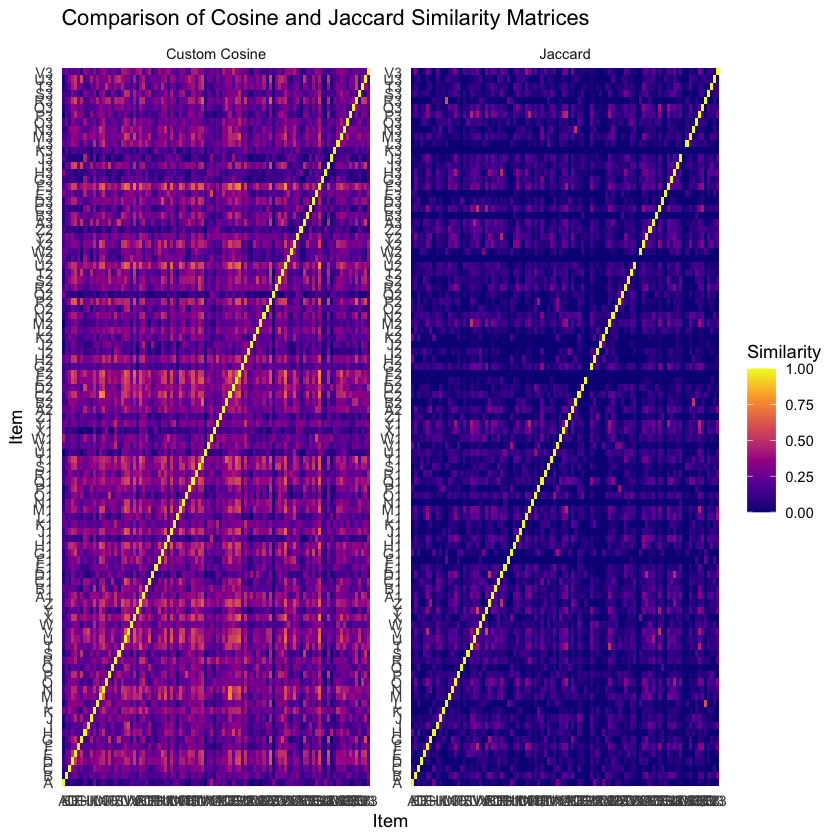

In [33]:
ggplot(combinedData, aes(x = Item1, y = Item2, fill = Similarity)) + 
  geom_tile() + 
  facet_wrap(~Matrix, scales = "free") + 
  theme_minimal() + 
  labs(title = "Comparison of Cosine and Jaccard Similarity Matrices", x = "Item", y = "Item", fill = "Similarity") + 
  scale_fill_viridis_c(option = "C")

## 6.5 Produktabdeckung - Top-N Listen von IBCF und UBCF [12 Punkte]
Aufgabe 5: Vergleiche und diskutiere Top-N Empfehlungen von IBCF und UBCF Modellen mit 30 Nachbarn
und Cosine Similarity für den reduzierten Datensatz.
### 1. Berechne die Top-15 Empfehlungen aller Testnutzer*innen via IBCF und UBCF,

Hinweise:
• Diese Aufgabe ist eine Fortsetzung von Aufgabe 3.
• Die Analyse soll sinnvoll Visualisierungen und Tabellen verwenden und die Resultate diskutieren.
• Die Aufgabe beleuchtet, wie Empfehlungen unterschiedlicher Modelle den Produktkatalog abdecken.
Diskutiere in diesem Zusammenhang die pauschale Behauptung “Recommender Systeme machen
für alle Nutzer*innen die gleichen Empfehlungen”.

In [34]:
library(recommenderlab)

# Assuming 'reducedMatrix1' is your reduced realRatingMatrix data set
# Split data into training and test sets
evaluationScheme <- evaluationScheme(reducedMatrix1, method = "split", train = 0.8, given = -1, goodRating = 4)
trainSet <- getData(evaluationScheme, "train")
testSet <- getData(evaluationScheme, "known")

# Assuming `reducedMatrix` is your reduced data set
# and `testSet` is the portion of your data used for testing

# Create IBCF model
ibcfModel <- Recommender(trainSet, method = "IBCF", param = list(k = 30, method = "Cosine"))
ibcf_model
ubcfModel <- Recommender(trainSet, method = "UBCF", param = list(method = "Cosine"))
ubcfModel

# Function to get top N recommendations
getTopN <- function(model, data, n = 15) {
    sapply(seq(nrow(data)), function(i) {
        recs <- predict(model, newdata = data[i, ], n = n)
        as(recs, "list")[[1]]
    })
}

# Get top 15 recommendations for all users
top15_ibcf <- getTopN(ibcfModel, testSet)
top15_ubcf <- getTopN(ubcfModel, testSet)


Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 300 users.

Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 240 users.

### 2. Vergleiche die Top-15 Empfehlungen von IBCF vs UBCF für drei Testnutzer*innen mittels Tabelle,

In [35]:
# Function to get top N recommendations and return as a list
getTopN <- function(model, data, n = 15) {
  rec_list <- list()
  for (i in 1:nrow(data)) {
    recs <- predict(model, newdata = data[i, ], n = n)
    rec_list[[rownames(data)[i]]] <- as(recs, "list")[[1]]
  }
  return(rec_list)
}

# Get top 15 recommendations for all users
top15_ibcf <- getTopN(ibcfModel, testSet)
top15_ubcf <- getTopN(ubcfModel, testSet)

# Randomly select three test users
sample_users <- sample(rownames(testSet), 3)

# Extract recommendations for these users and create a data frame for comparison
comparison <- lapply(sample_users, function(u) {
  ibcf_rec <- top15_ibcf[[u]]
  ubcf_rec <- top15_ubcf[[u]]
  data.frame(User = u, IBCF = ibcf_rec, UBCF = ubcf_rec)
})

# View comparison
print(comparison)

[[1]]
   User                                 IBCF
1   290 Adventures of Robin Hood, The (1938)
2   290            Angels and Insects (1995)
3   290                   Hard Target (1993)
4   290                  Bed of Roses (1996)
5   290                   Stand by Me (1986)
6   290                      Clueless (1995)
7   290                 Graduate, The (1967)
8   290   Father of the Bride Part II (1995)
9   290             L.A. Confidential (1997)
10  290     Manchurian Candidate, The (1962)
11  290              Escape from L.A. (1996)
12  290                         Bound (1996)
13  290                        Casino (1995)
14  290               Sophie's Choice (1982)
15  290            Lawrence of Arabia (1962)
                                                       UBCF
1                                        Bob Roberts (1992)
2  Adventures of Priscilla, Queen of the Desert, The (1994)
3                                      Graduate, The (1967)
4                                 

### 3. Visualisiere und diskutiere für alle Testnutzer*innen summarisch die Verteilung der Top-15 Empfehlungen von IBCF und UBCF.

Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


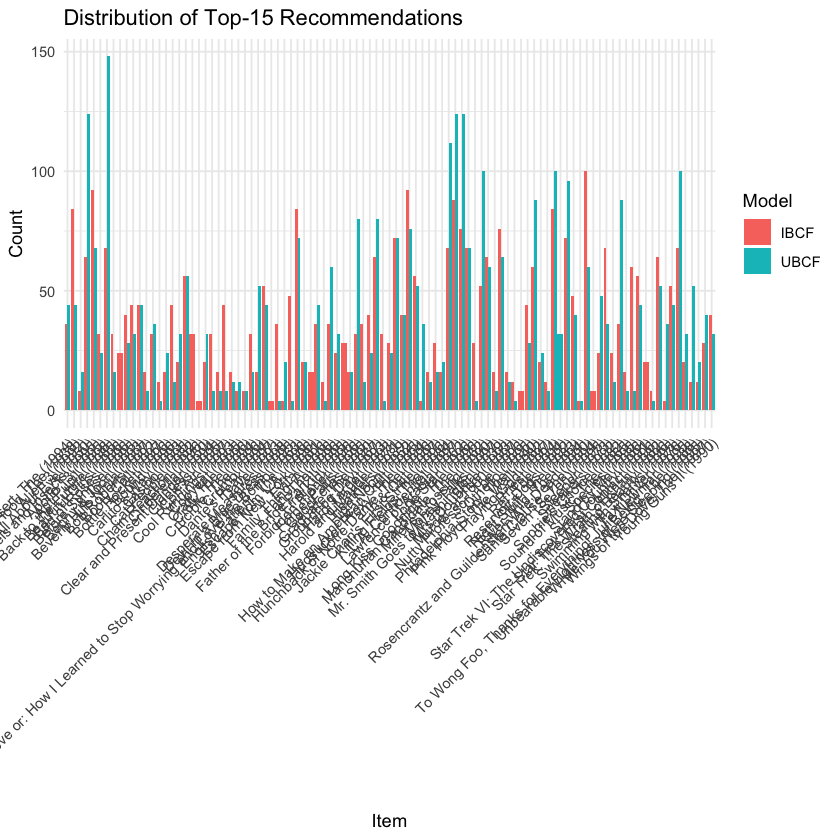

In [36]:
library(recommenderlab)
library(ggplot2)
library(dplyr)

# [Previous code steps to create the models and get top-N recommendations]

# Function to create a data frame for plotting
prepareForPlot <- function(recList, model) {
  recData <- do.call(rbind, lapply(recList, function(recs, user) {
    data.frame(User = user, Item = recs, Model = model)
  }, user = names(recList)))
  return(recData)
}

# Prepare data for plotting
plotDataIBCF <- prepareForPlot(top15_ibcf, "IBCF")
plotDataUBCF <- prepareForPlot(top15_ubcf, "UBCF")

# Combine data from both models
combinedPlotData <- rbind(plotDataIBCF, plotDataUBCF)

# Plotting the distribution of recommendations
ggplot(combinedPlotData, aes(x = Item, fill = Model)) +
  geom_histogram(stat = "count", position = "dodge") +
  theme_minimal() +
  labs(title = "Distribution of Top-15 Recommendations",
       x = "Item", y = "Count",
       fill = "Model") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## 6.6 Personalisierte Empfehlungen - Top-N Listen von IBCF und UBCF [16 Punkte]
Aufgabe 6: Untersuche den Einfluss von Ratings und Modelltyp auf Top-N Empfehlungen für den re-
duzierten Datensatz und vergleiche die Empfehlungen über alle Testnutzer*innen in den Top-15 Listen,
wenn Modelltyp und Rating verändert werden.
Vergleiche die Verteilung übereinstimmender Empfehlungen aller Testnutzer*innen in den Top-15 Listen für
### 1. IBCF vs UBCF, beide mit ordinalen Ratings und Cosine Similarity,
Hinweise:
• Diese Aufgabe ist eine Fortsetzung von Aufgabe 5.
• Gefordert ist eine vergleichende, statistische Analyse inklusive Visualisierung. Der erste Schritt dabei
ist die Übereinstimmung der Empfehlungen pro Nutzer*in zu untersuchen.
• Implementiere eine Funktion für die Überprüfung der Übereinstimmung von Empfehlungen

In [67]:
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")
evaluationScheme <- evaluationScheme(matrixReduced1, method = "split", train = 0.8, given = -1, goodRating = 4)
trainSet <- getData(evaluationScheme, "train")
testSet <- getData(evaluationScheme, "known")

In [68]:
ibcf <- Recommender(trainSet, "IBCF", param=list(k= 30, method = "cosine"))
ibcf

ubcf <- Recommender(testSet, "UBCF", param=list(nn= 30, method = "cosine"))
ubcf

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 240 users.

Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 60 users.

In [69]:
ibcfTopNList <- predict(ibcf, testSet, n=15)
ibcfTopNList

ubcfTopNList <- predict(ubcf, testSet, n=15)
ubcfTopNList

Recommendations as ‘topNList’ with n = 15 for 60 users. 

Recommendations as ‘topNList’ with n = 15 for 60 users. 

In [70]:
getTopNdataFrame <- function(topNList){
  counts <- table(unlist(as.array(as(topNList, "list"))))
  df <- data.frame(Movie = names(counts), Count = unname(counts)) %>%
    select("Movie", "Count.Freq") %>%
    rename("Count" = "Count.Freq") %>%
    arrange(desc(Count))  
  df
}

ibcfTopNdataFrame <- getTopNdataFrame(ibcfTopNList)
ibcfTopNdataFrame

ubcfTopNdataFrame <- getTopNdataFrame(ubcfTopNList)
ubcfTopNdataFrame

Movie,Count
<chr>,<int>
12 Angry Men (1957),12
Babe (1995),11
Casablanca (1942),10
"African Queen, The (1951)",8
Apt Pupil (1998),8
Blade Runner (1982),8
Citizen Kane (1941),8
"Close Shave, A (1995)",8
Arsenic and Old Lace (1944),7


Movie,Count
<chr>,<int>
Laura (1944),36
When We Were Kings (1996),36
"Bronx Tale, A (1993)",33
Kundun (1997),30
Wallace & Gromit: The Best of Aardman Animation (1996),29
"Thin Man, The (1934)",28
Angels and Insects (1995),26
"Sweet Hereafter, The (1997)",25
Duck Soup (1933),20


In [93]:
compareModels <- function(ibcf, ubcf) {
  stopifnot(is.data.frame(ibcf))
  stopifnot(is.data.frame(ubcf))
  print(paste("Recommendations IBCF:", nrow(ibcf)))
  print(paste("Recommendations UBCF:", nrow(ubcf)))

  intersectIbcfUbcf <- intersect(ibcf$Movie, ubcf$Movie)

  print(paste("Similar recommendations:", length(intersectIbcfUbcf)))
  print(paste("Proportion IBCF:", length(intersectIbcfUbcf) / nrow(ibcf) * 100))
  print(paste("Proportion UBCF:", length(intersectIbcfUbcf) / nrow(ubcf) * 100))
}

print("First Reduction without Normalization")
compareModels(ibcfTopNdataFrame, ubcfTopNdataFrame)
# print("Zweite Datenreduktion")
# compare_ibcf_ubcf(ribcftopN_df_2, rubcftopN_df_2)

[1] "First Reduction without Normalization"
[1] "Recommendations IBCF: 418"
[1] "Recommendations UBCF: 153"
[1] "Similar recommendations: 102"
[1] "Proportion IBCF: 24.4019138755981"
[1] "Proportion UBCF: 66.6666666666667"


First Reduction Set:  
IBCF recommends 418 movies.  
UBCF recommends 153 movies.  
The intersect between both recommenders for the first reduced dataset is 102 movies.  
The relative intersect for IBCF is 24% and for UBCF it is 67%.  
Both methods are not giving similar recommendations.  
#############################################TODO WHY???#############################################

### 2. IBCF vs UBCF, beide mit ordinalen, normalisierten Ratings und Cosine Similarity.
Hinweise:
• Diese Aufgabe ist eine Fortsetzung von Aufgabe 5.
• Gefordert ist eine vergleichende, statistische Analyse inklusive Visualisierung. Der erste Schritt dabei
ist die Übereinstimmung der Empfehlungen pro Nutzer*in zu untersuchen.
• Implementiere eine Funktion für die Überprüfung der Übereinstimmung von Empfehlungen

In [86]:
MovieLenseNorm <- normalize(MovieLense)
dfNorm <- as(MovieLenseNorm, "data.frame")

fUser <- 80
fMovie <- 40

filteredUsers <- df %>%
    group_by(user) %>%
    filter(n() >= fUser) %>%
    ungroup()

filteredMovies <- df %>%
    group_by(item) %>%
    filter(n() >= fMovie) %>%
    ungroup()

getDfReduced1 <- function(df, filteredUsers, filteredMovies) {
    dfReduced <- df %>%
        filter(user %in% filteredUsers$user, item %in% filteredMovies$item)
    uniqueUsers <- unique(dfReduced$user)
    usersReduced1 <- uniqueUsers[1:300]
    dfReduced1 <- dfReduced %>%
        filter(user %in% usersReduced1)
    return(dfReduced1)
}

dfReduced1Norm <- getDfReduced1(dfNorm, filteredUsers, filteredMovies)
cat("Number of users dfReduced1:", n_distinct(dfReduced1$user), "\n")

Number of users dfReduced1: 300 


In [87]:
matrixReduced1Norm <- as(dfReduced1Norm, "realRatingMatrix")
evaluationScheme <- evaluationScheme(matrixReduced1Norm, method = "split", train = 0.8, given = -1, goodRating = 4)
trainSetNorm <- getData(evaluationScheme, "train")
testSetNorm <- getData(evaluationScheme, "known")

In [88]:
ibcfNorm <- Recommender(trainSet, "IBCF", param=list(k= 30, method = "cosine"))
ibcfNorm

ubcfNorm <- Recommender(testSet, "UBCF", param=list(nn= 30, method = "cosine"))
ubcfNorm

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 240 users.

Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 60 users.

In [89]:
ibcfTopNListNorm <- predict(ibcfNorm, testSetNorm, n=15)
ibcfTopNListNorm

ubcfTopNListNorm <- predict(ubcfNorm, testSetNorm, n=15)
ubcfTopNListNorm

Recommendations as ‘topNList’ with n = 15 for 60 users. 

Recommendations as ‘topNList’ with n = 15 for 60 users. 

In [90]:
getTopNdataFrame <- function(topNList){
  counts <- table(unlist(as.array(as(topNList, "list"))))
  df <- data.frame(Movie = names(counts), Count = unname(counts)) %>%
    select("Movie", "Count.Freq") %>%
    rename("Count" = "Count.Freq") %>%
    arrange(desc(Count))  
  df
}

ibcfTopNdataFrameNorm <- getTopNdataFrame(ibcfTopNListNorm)
ibcfTopNdataFrameNorm

ubcfTopNdataFrameNorm <- getTopNdataFrame(ubcfTopNListNorm)
ubcfTopNdataFrameNorm

Movie,Count
<chr>,<int>
12 Angry Men (1957),11
Apt Pupil (1998),11
"Adventures of Robin Hood, The (1938)",8
"African Queen, The (1951)",8
Babe (1995),8
Dead Man Walking (1995),8
Strictly Ballroom (1992),8
Alice in Wonderland (1951),7
"Bridge on the River Kwai, The (1957)",7


Movie,Count
<chr>,<int>
When We Were Kings (1996),42
Laura (1944),38
"Bronx Tale, A (1993)",35
"Thin Man, The (1934)",31
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",24
Secrets & Lies (1996),24
Wallace & Gromit: The Best of Aardman Animation (1996),22
Lawrence of Arabia (1962),17
"Basketball Diaries, The (1995)",16


In [92]:
compareModels <- function(ibcf, ubcf) {
  stopifnot(is.data.frame(ibcf))
  stopifnot(is.data.frame(ubcf))
  print(paste("Recommendations IBCF:", nrow(ibcf)))
  print(paste("Recommendations UBCF:", nrow(ubcf)))

  intersectIbcfUbcf <- intersect(ibcf$Movie, ubcf$Movie)

  print(paste("Similar recommendations:", length(intersectIbcfUbcf)))
  print(paste("Proportion IBCF:", length(intersectIbcfUbcf) / nrow(ibcf) * 100))
  print(paste("Proportion UBCF:", length(intersectIbcfUbcf) / nrow(ubcf) * 100))
}

print("First Reduction with Normalization")
compareModels(ibcfTopNdataFrameNorm, ubcfTopNdataFrameNorm)

[1] "First Reduction with Normalization"
[1] "Recommendations IBCF: 421"
[1] "Recommendations UBCF: 167"
[1] "Similar recommendations: 122"
[1] "Proportion IBCF: 28.978622327791"
[1] "Proportion UBCF: 73.0538922155689"


[1] "First Reduction without Normalization"  
[1] "Recommendations IBCF: 418"  
[1] "Recommendations UBCF: 153"  
[1] "Similar recommendations: 102"  
[1] "Proportion IBCF: 24.4019138755981"  
[1] "Proportion UBCF: 66.6666666666667"  


The results are similar as without normalized ratings.  
But we get a small increase in similar recommendations, due to normalizing.  
Normalized ratings make the recommendations more similar.  
##################################TODO WHY???????????????????############################

## 6.7 Analyse Top-N Listen - IBCF vs SVD [8 Punkte]
Aufgabe 7: Vergleiche Memory-based und Modell-based Recommenders bezüglich Überschneidung der
Top-N Empfehlungen für den reduzierten Datensatz, analog zur vorangehenden Aufgabe.
Vergleiche wie sich der Anteil übereinstimmender Empfehlungen der Top-15 Liste verändert für
### 1. IBCF (Cosine Similarity, 30 Nachbarn, ordinale Ratings) vs Truncated SVD Modelle mit Variation der Anzahl Singulärwerte
Hinweise:  
• Diese Aufgabe ist eine Fortsetzung von Aufgabe 6.  
• Gefordert ist eine vergleichende, statistische Analyse inklusive Visualisierung.  
• Die Anzahl Singulärwert ist zu variieren von 10 auf 20, 30, 40, und 50.  

In [122]:
MovieLense <- normalize(MovieLense)
df <- as(MovieLense, "data.frame")

fUser <- 80
fMovie <- 40

filteredUsers <- df %>%
    group_by(user) %>%
    filter(n() >= fUser) %>%
    ungroup()

filteredMovies <- df %>%
    group_by(item) %>%
    filter(n() >= fMovie) %>%
    ungroup()

getDfReduced1 <- function(df, filteredUsers, filteredMovies) {
    dfReduced <- df %>%
        filter(user %in% filteredUsers$user, item %in% filteredMovies$item)
    uniqueUsers <- unique(dfReduced$user)
    usersReduced1 <- uniqueUsers[1:300]
    dfReduced1 <- dfReduced %>%
        filter(user %in% usersReduced1)
    return(dfReduced1)
}

dfReduced1 <- getDfReduced1(df, filteredUsers, filteredMovies)

In [123]:
getSVDtopNrec <- function(trainSet, testSet, singularValues) {
    svd <- Recommender(trainSet, "SVD", param = list(k = singularValues))
    topN <- predict(svd, testSet, n = 15)
    return(topN)
}

In [124]:
nValues <- c(10, 20, 30, 40, 50)

In [146]:
matrixReduced1 <- as(dfReduced1, "realRatingMatrix")
# given_values <- c(5, 10 , 20, 40)
evaluationScheme <- evaluationScheme(reducedMatrix1, method = "split", train = 0.8, given = 5, goodRating = 4)
trainSet <- getData(evaluationScheme, "train")
testSet <- getData(evaluationScheme, "known")

svdTopN <- list()
for (i in 1:length(nValues)) {
    n <- nValues[i]
    name <- paste("singularValues", n)
    svdTopN[[name]] <- getSVDtopNrec(trainSet, testSet, n)
}
svdTopN

Warning message in irlba::irlba(m, nv = p$k, maxit = p$maxiter):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


$`singularValues 10`
Recommendations as ‘topNList’ with n = 15 for 60 users. 

$`singularValues 20`
Recommendations as ‘topNList’ with n = 15 for 60 users. 

$`singularValues 30`
Recommendations as ‘topNList’ with n = 15 for 60 users. 

$`singularValues 40`
Recommendations as ‘topNList’ with n = 15 for 60 users. 

$`singularValues 50`
Recommendations as ‘topNList’ with n = 15 for 60 users. 


In [147]:
getTopNdataFrames <- function(svdTopNList) {
  topNdataFrames <- list()
  for (i in 1:length(svdTopNList)) {
    name <- names(svdTopNList)[i]
    df_name <- paste(name)
    topNdataFrames[[df_name]] <- getTopNdataFrame(svdTopNList[[i]])
  }
  return(topNdataFrames)
}

svdTopNdataFrames <- getTopNdataFrames(svdTopN)

test_that("svdTopNdataFrames is not empty", {
  expect_false(is_empty(svdTopNdataFrames))
})

Test passed 😸


In [154]:
compareIBCFsvd <- function(ibcf, svd, singularValue) {
    intersect <- intersect(ibcf$Movie, svd$Movie)
    print(paste("Similar Recommendations for singular value", singularValue, ":", length(intersect)))
    print(paste("Common relative proportion for number of singular value", singularValue, ":", length(intersect) / nrow(ibcf) * 100))
    cat("\n")
}

for (i in 1:length(nValues)) {
    n <- nValues[i]
    name <- paste("singularValues", n)
    compareIBCFsvd(ibcfTopNdataFrame, svdTopNdataFrames[[name]], n)
}

[1] "Similar Recommendations for singular value 10 : 26"
[1] "Common relative proportion for number of singular value 10 : 6.2200956937799"

[1] "Similar Recommendations for singular value 20 : 26"
[1] "Common relative proportion for number of singular value 20 : 6.2200956937799"

[1] "Similar Recommendations for singular value 30 : 26"
[1] "Common relative proportion for number of singular value 30 : 6.2200956937799"

[1] "Similar Recommendations for singular value 40 : 29"
[1] "Common relative proportion for number of singular value 40 : 6.9377990430622"

[1] "Similar Recommendations for singular value 50 : 29"
[1] "Common relative proportion for number of singular value 50 : 6.9377990430622"



First reduced dataset:  
For the first reduced dataset we get an intersect of 26 out of 418 recommendations for the svd model.  
If we increase the amount of singular values, we get more similar recommendations, but not high in number.  
There is also no difference between 40 and 50 singular values, both recommend the same amount of similar recommendations.  
#####################################TODO WHY???????????###########################

## 6.8 Implementierung Top-N Metriken [16 Punkte]
Aufgabe 8 (DIY): Implementiere Funktionen, um aus den Top-N Listen aller Nutzer*innen die Item-space
Coverage@N und Novelty@N eines Recommenders zu beurteilen.
Visualisiere diese System-Metriken als Scatterplot “Novelty vs Coverage” für Top-N Listen der Länge N = 5,
10, 15, 20, 25, 30 mit
### 1. IBCF (Cosine Similarity, 30 Nachbarn),
### 2. Truncated SDV (30 Singulärwerte).
Hinweise:
• Diese Aufgabe dient dazu die zentrale Frage der Evaluierung von Recommender Systemen zu ver-
tiefen und dient als Input für die Entscheidung von Aufgabe 9.
• Die eigene Implementierung ist sinnvoll zu testen und zu dokumentieren.

In [200]:
MovieLenseDf <- as(MovieLense, "data.frame")

getFilteredUsersDf <- function(df, nUsers) {
    stopifnot(is.data.frame(df))
    filteredUsers <- df %>%
        group_by(user) %>%
        filter(n() >= fUser) %>%
        ungroup()
    return(filteredUsers)
}

getFilteredMoviesDf <- function(df, nMovies) {
    stopifnot(is.data.frame(df))
    filteredMovies <- df %>%
        group_by(item) %>%
        filter(n() >= fMovie) %>%
        ungroup()
    return (filteredMovies)
}

getDfReduced <- function(df, filteredUsers, filteredMovies, from, to) {
    dfReduced <- df %>%
        filter(user %in% filteredUsers$user, item %in% filteredMovies$item)
    uniqueUsers <- unique(dfReduced$user)
    usersReduced <- uniqueUsers[from:to]
    dfReduced1 <- dfReduced %>%
        filter(user %in% usersReduced)
    return(dfReduced)
}

filteredUsers <- getFilteredUsersDf(MovieLenseDf, 80)
filteredMovies <- getFilteredMoviesDf(MovieLenseDf, 40)
MovieLenseDf1 <- getDfReduced(MovieLenseDf, filteredUsers, filteredMovies, 1, 300)
MovieLenseDf2 <- getDfReduced(MovieLenseDf, filteredUsers, filteredMovies, 101, 400)


In [201]:
length(unique(MovieLenseDf1$user))

[1] 411

In [173]:
coverageN <- function(dataset, model, n) {
    model <- Recommender(dataset, model, param = list(k = n, method = "cosine"))
    topN <- predict(model, dataset, n = 15)
    listItems <- unique(
        unlist(
            as(topN, "list"),
            use.names = FALSE
        )
    )
    coverageN <- length(listItems) / nrow(dataset) * 100
    return(coverageN)
}

In [177]:
data(MovieLense)
coverageN(MovieLense, "IBCF", 30)

[1] 80.27572

In [ ]:
nValues <- c(5, 10, 15, 20, 25, 30)